In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
def compute_error(data, w, b):
    x = data[:,0]
    y = data[:,1]
    total_error = (y - w*x - b)**2
    total_error = np.sum(total_error)
    return total_error/(float(len(data)))

In [79]:
def sgd(data, current_w, current_b, learing_rate):
    w_gd = 0.0
    b_gd = 0.0
    
    #update w,b with gradiention
    #lost_function = 
    N = float(len(data))
    x = data[:,0]
    y = data[:,1]
    w_gd = -(2.0/N) * x * (y - current_w * x - current_b)
    b_gd = - (2.0/N) * (y - current_w * x - current_b)
    
    w_gd = np.sum(w_gd)
    b_gd = np.sum(b_gd)
    
    new_w = current_w - learing_rate * w_gd
    new_b = current_b - learing_rate * b_gd
    
    
    return new_w, new_b
    

In [84]:
def optimizer(data, init_w, init_b, learning_rate, num_iter):
    w = init_w
    b = init_b
    
    for i in range(num_iter):
        w, b = sgd(data, w, b, learning_rate)
        if i % 100 == 0:
            print ('iter {0}: w = {1}, b = {2}, error={3}'.format(i, w, b, compute_error(data, w, b)))
        
    return w, b 
        
    

In [97]:
def linear_regression(data):
    # init
    w = 0.0
    b = 0.0
    learning_rate = 1e-6
    num_iter = 1000
    
    #training
    w, b = optimizer(data, w, b, learning_rate, num_iter)

    #print final error
    print ('final formula parmaters:\n w = {1}\n b={2}\n error of end = {3} \n'.format(num_iter,w, b,compute_error(data, w, b)))

    #plot result
    plot_data(data, w,b)
    


In [114]:
def plot_data(data, w, b):

    #plottting
    x = data[:,0]
    y = data[:,1]
    y_predict = w * x + b
    plt.scatter(x, y)
    plt.plot(x, y_predict, 'kp-')
    plt.show()
#     pylab.plot(x, y ,'o')
#     pylab.plot(x, y_predict, 'k-')
#     pylab.show()

iter 0: w = 0.019483716513294325, b = 0.0003000474362710828, error=29308.701755409995
iter 100: w = 1.4517774869230569, b = 0.022363666907253634, error=8154.338588313643
iter 200: w = 2.2044725887657726, b = 0.033969993389769804, error=2312.16934171146
iter 300: w = 2.600026774424162, b = 0.040080830035994434, error=698.7460823304843
iter 400: w = 2.8078971991959025, b = 0.04330369067094855, error=253.16935867745656
iter 500: w = 2.9171365444613913, b = 0.04500886914531809, error=130.11508852116677
iter 600: w = 2.974543542602917, b = 0.04591647870231679, error=96.13136815681526
iter 700: w = 3.00471174115481, b = 0.04640495137154888, error=86.74613002004266
iter 800: w = 3.0205654769427492, b = 0.04667315976421695, error=84.15421840185982
iter 900: w = 3.0288967136779696, b = 0.046825614895238836, error=83.43840973866881
final formula parmaters:
 w = 3.0332434502235746
 b=0.046916514983187656
 error of end = 83.24169849059466 



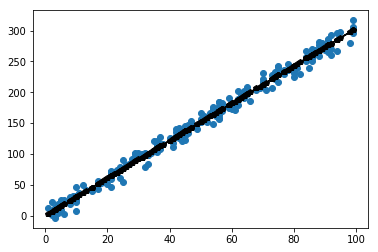

In [115]:
if __name__ =='__main__':
    data = np.loadtxt('Linear_Data.csv',delimiter=",")
    linear_regression(data)
#     x = data[:,0]
#     y = data[:,1]
#     plt.scatter(x, y)
#     plt.show()